In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lending-club/rejected_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv
/kaggle/input/lending-club/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv


# EDA

In [2]:
# 1:Load Data
import pandas as pd
df = pd.read_csv("/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz", low_memory=False)

print("Shape:", df.shape)
print("\nColumn Names:\n")
print(df.columns.tolist())

df.head()


Shape: (2260701, 151)

Column Names:

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verific

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:

import numpy as np

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)

print("Shape:", df.shape)
print("\nDtype summary:")
print(df.dtypes.value_counts())

print("\nFirst 5 rows:")
display(df.head())

# Missingness % (top 40 columns)
na = df.isna().mean().sort_values(ascending=False)*100
print("\nMissing value % (top 40):")
display(na.head(40).to_frame("missing_%"))

# Key columns
cols_preview = [
    "loan_status","int_rate","annual_inc","dti","loan_amnt","term",
    "emp_length","home_ownership","purpose","addr_state","issue_d",
    "earliest_cr_line","fico_range_low","fico_range_high","revol_util"
]
keep = [c for c in cols_preview if c in df.columns]
print("\nValue counts / describe for key columns:")
for c in keep:
    print(f"\n--- {c} ---")
    if df[c].dtype == "O":
        display(df[c].value_counts(dropna=False).head(20))
    else:
        display(df[c].describe())


Shape: (2260701, 151)

Dtype summary:
float64    113
object      38
Name: count, dtype: int64

First 5 rows:


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N


Missing value % (top 40):


,missing_%
member_id,100.000000
orig_projected_additional_accrued_interest,99.617331
hardship_end_date,99.517097
hardship_length,99.517097
hardship_loan_status,99.517097
payment_plan_start_date,99.517097
hardship_status,99.517097
hardship_type,99.517097
hardship_reason,99.517097
deferral_term,99.517097



Value counts / describe for key columns:

--- loan_status ---


loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: count, dtype: int64


--- int_rate ---


count    2.260668e+06
mean     1.309283e+01
std      4.832138e+00
min      5.310000e+00
25%      9.490000e+00
50%      1.262000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64


--- annual_inc ---


count    2.260664e+06
mean     7.799243e+04
std      1.126962e+05
min      0.000000e+00
25%      4.600000e+04
50%      6.500000e+04
75%      9.300000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64


--- dti ---


count    2.258957e+06
mean     1.882420e+01
std      1.418333e+01
min     -1.000000e+00
25%      1.189000e+01
50%      1.784000e+01
75%      2.449000e+01
max      9.990000e+02
Name: dti, dtype: float64


--- loan_amnt ---


count    2.260668e+06
mean     1.504693e+04
std      9.190245e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.290000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64


--- term ---


term
 36 months    1609754
 60 months     650914
NaN                33
Name: count, dtype: int64


--- emp_length ---


emp_length
10+ years    748005
2 years      203677
< 1 year     189988
3 years      180753
1 year       148403
NaN          146940
5 years      139698
4 years      136605
6 years      102628
7 years       92695
8 years       91914
9 years       79395
Name: count, dtype: int64


--- home_ownership ---


home_ownership
MORTGAGE    1111450
RENT         894929
OWN          253057
ANY             996
OTHER           182
NONE             54
NaN              33
Name: count, dtype: int64


--- purpose ---


purpose
debt_consolidation    1277877
credit_card            516971
home_improvement       150457
other                  139440
major_purchase          50445
medical                 27488
small_business          24689
car                     24013
vacation                15525
moving                  15403
house                   14136
wedding                  2355
renewable_energy         1445
educational               424
NaN                        33
Name: count, dtype: int64


--- addr_state ---


addr_state
CA    314533
NY    186389
TX    186335
FL    161991
IL     91173
NJ     83132
PA     76939
OH     75132
GA     74196
VA     62954
NC     62730
MI     58770
MD     54008
AZ     53777
MA     51784
CO     48183
WA     47060
MN     39517
IN     37515
MO     36084
Name: count, dtype: int64


--- issue_d ---


issue_d
Mar-2016    61992
Oct-2015    48631
May-2018    46311
Oct-2018    46305
Aug-2018    46079
Jul-2015    45962
Dec-2015    44343
Aug-2017    43573
Jul-2018    43089
Apr-2018    42928
Nov-2017    42343
Nov-2018    41973
Jun-2018    41533
Dec-2018    40134
Sep-2017    39713
Feb-2016    39529
Jul-2017    39415
Sep-2018    39026
Oct-2014    38783
Mar-2018    38771
Name: count, dtype: int64


--- earliest_cr_line ---


earliest_cr_line
Sep-2004    15400
Sep-2003    15215
Sep-2005    14780
Aug-2003    14669
Aug-2004    14413
Aug-2001    14355
Aug-2002    14322
Aug-2005    14207
Aug-2006    14143
Oct-2003    14108
Sep-2002    13823
Oct-2004    13602
Aug-2000    13497
Oct-2002    13437
Oct-2001    13424
Jul-2003    13243
Oct-2000    12909
Nov-2004    12527
Jul-2004    12376
Sep-2000    12252
Name: count, dtype: int64


--- fico_range_low ---


count    2.260668e+06
mean     6.985882e+02
std      3.301038e+01
min      6.100000e+02
25%      6.750000e+02
50%      6.900000e+02
75%      7.150000e+02
max      8.450000e+02
Name: fico_range_low, dtype: float64


--- fico_range_high ---


count    2.260668e+06
mean     7.025884e+02
std      3.301124e+01
min      6.140000e+02
25%      6.790000e+02
50%      6.940000e+02
75%      7.190000e+02
max      8.500000e+02
Name: fico_range_high, dtype: float64


--- revol_util ---


count    2.258866e+06
mean     5.033770e+01
std      2.471307e+01
min      0.000000e+00
25%      3.150000e+01
50%      5.030000e+01
75%      6.940000e+01
max      8.923000e+02
Name: revol_util, dtype: float64

In [4]:
# 2 — Target mapping (binary)

default_labels = {
    "Charged Off", "Default",
    "Does not meet the credit policy. Status:Charged Off"
}
paid_labels = {
    "Fully Paid",
    "Does not meet the credit policy. Status:Fully Paid"
}

mask = df["loan_status"].isin(default_labels.union(paid_labels))
df_bin = df.loc[mask].copy()
df_bin["target"] = np.where(df_bin["loan_status"].isin(default_labels), 1, 0)

print("Shape after filtering:", df_bin.shape)
print("Class counts:")
print(df_bin["target"].value_counts().rename({0:"Fully Paid (0)",1:"Default (1)"}))
print("\nClass ratio (Default rate):", df_bin["target"].mean().round(4))

# Peek
df_bin[["loan_status","target"]].head(10)


Shape after filtering: (1348099, 152)
Class counts:
target
Fully Paid (0)    1078739
Default (1)        269360
Name: count, dtype: int64

Class ratio (Default rate): 0.1998


,loan_status,target
0,Fully Paid,0
1,Fully Paid,0
2,Fully Paid,0
4,Fully Paid,0
5,Fully Paid,0
6,Fully Paid,0
7,Fully Paid,0
8,Fully Paid,0
9,Fully Paid,0
12,Fully Paid,0


In [5]:
# Cell 3 — Feature engineering

df_fe = df_bin.copy()

# 1) Parse dates
for col, fmt in [("issue_d","%b-%Y"), ("earliest_cr_line","%b-%Y")]:
    if col in df_fe.columns:
        df_fe[col] = pd.to_datetime(df_fe[col], format=fmt, errors="coerce")

# 2) Percent strings → numeric fractions
def pct_to_float(s):
    if pd.isna(s): return np.nan
    if isinstance(s, str): s = s.strip().replace("%","")
    try: return float(s)
    except: return np.nan

if "int_rate" in df_fe.columns:
    df_fe["int_rate_num"] = df_fe["int_rate"].apply(pct_to_float) / 100.0

if "revol_util" in df_fe.columns:
    df_fe["revol_util_num"] = df_fe["revol_util"].apply(pct_to_float) / 100.0
    # clip extreme nonsense (e.g., 8.923 → 892.3%)
    df_fe["revol_util_num"] = df_fe["revol_util_num"].clip(lower=0, upper=1.5)

# 3) Term "36 months"/"60 months" → 36/60
def term_to_int(x):
    if pd.isna(x): return np.nan
    if isinstance(x,str):
        x = x.lower().replace("months","").strip()
    try: return float(x)
    except: return np.nan

if "term" in df_fe.columns:
    df_fe["term_months"] = df_fe["term"].apply(term_to_int)

# 4) Employment length → years (10+→10, <1→0.5)
def emp_len_to_years(x):
    if pd.isna(x): return np.nan
    s = str(x).lower().strip()
    if s in {"n/a","na","none"}: return np.nan
    if "10+" in s: return 10.0
    if "< 1" in s: return 0.5
    digits = "".join(ch for ch in s if ch.isdigit())
    return float(digits) if digits else np.nan

if "emp_length" in df_fe.columns:
    df_fe["emp_len_yrs"] = df_fe["emp_length"].apply(emp_len_to_years)


# 5) Credit history length (months) = issue_d - earliest_cr_line
def months_between(a, b):
    if pd.isna(a) or pd.isna(b):
        return np.nan
    return (b.year - a.year) * 12 + (b.month - a.month)

df_fe["credit_hist_mths"] = df_fe.apply(
    lambda r: months_between(r["earliest_cr_line"], r["issue_d"]), axis=1
)


# 6) DTI cleanup: invalid sentinels to NaN
if "dti" in df_fe.columns:
    df_fe.loc[(df_fe["dti"] < 0) | (df_fe["dti"] >= 999), "dti"] = np.nan

# 7) Annual income winsorize at 99th percentile to limit extreme outliers
if "annual_inc" in df_fe.columns:
    inc_cap = df_fe["annual_inc"].quantile(0.99)
    df_fe["annual_inc"] = np.where(df_fe["annual_inc"] > inc_cap, inc_cap, df_fe["annual_inc"])

# Summary of engineered columns
engineered = ["int_rate_num","revol_util_num","term_months","emp_len_yrs","credit_hist_mths"]
present = [c for c in engineered if c in df_fe.columns]

print("Engineered columns present:", present)
print("\nDescribe (engineered numerics):")
display(df_fe[present].describe())

print("\nMissing % for engineered cols:")
display((df_fe[present].isna().mean()*100).round(2).to_frame("missing_%"))

df_work = df_fe.copy()


Engineered columns present: ['int_rate_num', 'revol_util_num', 'term_months', 'emp_len_yrs', 'credit_hist_mths']

Describe (engineered numerics):


,int_rate_num,revol_util_num,term_months,emp_len_yrs,credit_hist_mths
count,1.348099e+06,1.347202e+06,1.348099e+06,1.269549e+06,1.348070e+06
mean,1.324156e-01,5.181110e-01,4.178402e+01,6.004801e+00,1.950060e+02
std,4.765685e-02,2.451704e-01,1.026458e+01,3.624829e+00,9.009716e+01
min,5.310000e-02,0.000000e+00,3.600000e+01,5.000000e-01,6.000000e+00
25%,9.750000e-02,3.340000e-01,3.600000e+01,2.000000e+00,1.340000e+02
50%,1.274000e-01,5.220000e-01,3.600000e+01,6.000000e+00,1.770000e+02
75%,1.599000e-01,7.070000e-01,3.600000e+01,1.000000e+01,2.400000e+02
max,3.099000e-01,1.500000e+00,6.000000e+01,1.000000e+01,9.990000e+02



Missing % for engineered cols:


,missing_%
int_rate_num,0.00
revol_util_num,0.07
term_months,0.00
emp_len_yrs,5.83
credit_hist_mths,0.00


In [6]:
# Cell 4 — final predictive features

num_cols = [
    "loan_amnt","int_rate_num","installment","annual_inc","dti",
    "fico_range_low","fico_range_high","open_acc","pub_rec","revol_util_num",
    "total_acc","credit_hist_mths","term_months","emp_len_yrs"
]

cat_cols = [
    "home_ownership","purpose","addr_state","verification_status"
]

# Keep only existing
num_cols = [c for c in num_cols if c in df_work.columns]
cat_cols = [c for c in cat_cols if c in df_work.columns]

cols_needed = ["issue_d","target"] + num_cols + cat_cols
df_model = df_work[cols_needed].copy()

print("Model dataframe shape:", df_model.shape)
print("\nNumeric columns:", num_cols)
print("Categorical columns:", cat_cols)

print("\nNumeric summary:")
display(df_model[num_cols].describe())

print("\nCategorical value counts (top 10 each):")
for c in cat_cols:
    print(f"\n--- {c} ---")
    display(df_model[c].value_counts(dropna=False).head(10))


Model dataframe shape: (1348099, 20)

Numeric columns: ['loan_amnt', 'int_rate_num', 'installment', 'annual_inc', 'dti', 'fico_range_low', 'fico_range_high', 'open_acc', 'pub_rec', 'revol_util_num', 'total_acc', 'credit_hist_mths', 'term_months', 'emp_len_yrs']
Categorical columns: ['home_ownership', 'purpose', 'addr_state', 'verification_status']

Numeric summary:


,loan_amnt,int_rate_num,installment,annual_inc,dti,fico_range_low,fico_range_high,open_acc,pub_rec,revol_util_num,total_acc,credit_hist_mths,term_months,emp_len_yrs
count,1.348099e+06,1.348099e+06,1.348099e+06,1.348095e+06,1.347685e+06,1.348099e+06,1.348099e+06,1.348070e+06,1.348070e+06,1.347202e+06,1.348070e+06,1.348070e+06,1.348099e+06,1.269549e+06
mean,1.440900e+04,1.324156e-01,4.377778e+02,7.456876e+04,1.824663e+01,6.961622e+02,7.001624e+02,1.159045e+01,2.150497e-01,5.181110e-01,2.497599e+01,1.950060e+02,4.178402e+01,6.004801e+00
std,8.716138e+03,4.765685e-02,2.614972e+02,4.222876e+04,9.865464e+00,3.185079e+01,3.185143e+01,5.474680e+00,6.014718e-01,2.451704e-01,1.200356e+01,9.009716e+01,1.026458e+01,3.624829e+00
min,5.000000e+02,5.310000e-02,4.930000e+00,0.000000e+00,0.000000e+00,6.100000e+02,6.140000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+00,3.600000e+01,5.000000e-01
25%,7.975000e+03,9.750000e-02,2.482800e+02,4.575000e+04,1.179000e+01,6.700000e+02,6.740000e+02,8.000000e+00,0.000000e+00,3.340000e-01,1.600000e+01,1.340000e+02,3.600000e+01,2.000000e+00
50%,1.200000e+04,1.274000e-01,3.750400e+02,6.500000e+04,1.761000e+01,6.900000e+02,6.940000e+02,1.100000e+01,0.000000e+00,5.220000e-01,2.300000e+01,1.770000e+02,3.600000e+01,6.000000e+00
75%,2.000000e+04,1.599000e-01,5.802200e+02,9.000000e+04,2.405000e+01,7.100000e+02,7.140000e+02,1.400000e+01,0.000000e+00,7.070000e-01,3.200000e+01,2.400000e+02,3.600000e+01,1.000000e+01
max,4.000000e+04,3.099000e-01,1.719830e+03,2.510000e+05,9.915700e+02,8.450000e+02,8.500000e+02,9.000000e+01,8.600000e+01,1.500000e+00,1.760000e+02,9.990000e+02,6.000000e+01,1.000000e+01



Categorical value counts (top 10 each):

--- home_ownership ---


home_ownership
MORTGAGE    666852
RENT        535699
OWN         145027
ANY            286
OTHER          182
NONE            53
Name: count, dtype: int64


--- purpose ---


purpose
debt_consolidation    781442
credit_card           295625
home_improvement       87721
other                  78301
major_purchase         29550
medical                15614
small_business         15577
car                    14652
moving                  9526
vacation                9084
Name: count, dtype: int64


--- addr_state ---


addr_state
CA    196853
TX    110354
NY    110097
FL     95843
IL     51870
NJ     48583
PA     45656
OH     43947
GA     43480
VA     38119
Name: count, dtype: int64


--- verification_status ---


verification_status
Source Verified    521579
Verified           418979
Not Verified       407541
Name: count, dtype: int64

In [7]:
# Cell 5 — Time-based split

# Ensure issue_d is datetime
df_model = df_model.copy()
df_model["issue_d"] = pd.to_datetime(df_model["issue_d"], errors="coerce")

# Drop rows without issue_d
df_model = df_model[~df_model["issue_d"].isna()].copy()

# Time splits
train_df = df_model[df_model["issue_d"] <= "2016-12-31"].copy()
val_df   = df_model[(df_model["issue_d"] >= "2017-01-01") & (df_model["issue_d"] <= "2017-12-31")].copy()
test_df  = df_model[(df_model["issue_d"] >= "2018-01-01") & (df_model["issue_d"] <= "2018-12-31")].copy()

def show_split(name, d):
    if len(d) == 0:
        print(f"{name}: n=0")
        return
    print(f"{name}: n={len(d):,} | default%={d['target'].mean():.3f} | "
          f"date range: {d['issue_d'].min().date()} → {d['issue_d'].max().date()}")

show_split("TRAIN", train_df)
show_split("VAL",   val_df)
show_split("TEST",  test_df)

# Extract X/y
feature_cols = [c for c in df_model.columns if c not in ("issue_d","target")]
X_train, y_train = train_df[feature_cols], train_df["target"].values
X_val,   y_val   = val_df[feature_cols],   val_df["target"].values
X_test,  y_test  = test_df[feature_cols],  test_df["target"].values

print("\nShapes:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val:  ", X_val.shape,   "y_val:  ", y_val.shape)
print("X_test: ", X_test.shape,  "y_test: ", y_test.shape)

# Peek 
display(X_train.head(3))


TRAIN: n=1,122,460 | default%=0.197 | date range: 2007-06-01 → 2016-12-01
VAL: n=169,321 | default%=0.231 | date range: 2017-01-01 → 2017-12-01
TEST: n=56,318 | default%=0.158 | date range: 2018-01-01 → 2018-12-01

Shapes:
X_train: (1122460, 18) y_train: (1122460,)
X_val:   (169321, 18) y_val:   (169321,)
X_test:  (56318, 18) y_test:  (56318,)


,loan_amnt,int_rate_num,installment,annual_inc,dti,fico_range_low,fico_range_high,open_acc,pub_rec,revol_util_num,total_acc,credit_hist_mths,term_months,emp_len_yrs,home_ownership,purpose,addr_state,verification_status
0,3600.0,0.1399,123.03,55000.0,5.91,675.0,679.0,7.0,0.0,0.297,13.0,148.0,36.0,10.0,MORTGAGE,debt_consolidation,PA,Not Verified
1,24700.0,0.1199,820.28,65000.0,16.06,715.0,719.0,22.0,0.0,0.192,38.0,192.0,36.0,10.0,MORTGAGE,small_business,SD,Not Verified
2,20000.0,0.1078,432.66,63000.0,10.78,695.0,699.0,6.0,0.0,0.562,18.0,184.0,60.0,10.0,MORTGAGE,home_improvement,IL,Not Verified


In [8]:
# Cell 6 — Preprocessing pipeline: impute + scale (nums), one-hot (cats)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import joblib, os

# Identify numeric vs categorical from earlier splits
all_cols = X_train.columns.tolist()
cat_cols = ["home_ownership","purpose","addr_state","verification_status"]
cat_cols = [c for c in cat_cols if c in all_cols]  # safety
num_cols = [c for c in all_cols if c not in cat_cols]

num_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ],
    remainder="drop"
)

X_train_t = preprocess.fit_transform(X_train)
X_val_t   = preprocess.transform(X_val)
X_test_t  = preprocess.transform(X_test)

print("Transformed shapes:")
print("X_train_t:", X_train_t.shape)
print("X_val_t:  ", X_val_t.shape)
print("X_test_t: ", X_test_t.shape)

# Save the pipeline for reuse in modeling steps
os.makedirs("artifacts", exist_ok=True)
joblib.dump(preprocess, "artifacts/preprocess.pkl")
print("Saved: artifacts/preprocess.pkl")


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Transformed shapes:
X_train_t: (1122460, 88)
X_val_t:   (169321, 88)
X_test_t:  (56318, 88)
Saved: artifacts/preprocess.pkl


# DL

In [9]:
# Cell 7 — Train PyTorch MLP and report AUC/F1 (VAL+TEST)

import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import roc_auc_score, f1_score
import os

class TabDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.as_tensor(X, dtype=torch.float32)
        self.y = torch.as_tensor(y, dtype=torch.float32)
    def __len__(self): return len(self.y)
    def __getitem__(self, i): return self.X[i], self.y[i]

train_ds = TabDataset(X_train_t, y_train)
val_ds   = TabDataset(X_val_t,   y_val)
test_ds  = TabDataset(X_test_t,  y_test)

train_loader = DataLoader(train_ds, batch_size=2048, shuffle=True, num_workers=0)
val_loader   = DataLoader(val_ds,   batch_size=4096, shuffle=False, num_workers=0)
test_loader  = DataLoader(test_ds,  batch_size=4096, shuffle=False, num_workers=0)

# Model
class MLP(nn.Module):
    def __init__(self, in_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, 256), nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Linear(256, 128), nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.2),
            nn.Linear(128, 1)  # logits
        )
    def forward(self, x): 
        return self.net(x).squeeze(-1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP(X_train_t.shape[1]).to(device)

# Class imbalance handling
pos = y_train.sum()
neg = len(y_train) - pos
pos_weight = torch.tensor([neg / max(pos, 1)], dtype=torch.float32, device=device)

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-5)

def predict_proba(loader):
    model.eval()
    all_p, all_y = [], []
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device)
            logits = model(xb)
            prob = torch.sigmoid(logits).cpu().numpy()
            all_p.append(prob)
            all_y.append(yb.numpy())
    return np.concatenate(all_p), np.concatenate(all_y)

best_auc, patience, wait = -1.0, 5, 0
best_path = "artifacts/mlp_best.pt"
os.makedirs("artifacts", exist_ok=True)

for epoch in range(50):
    model.train()
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        loss = criterion(model(xb), yb)
        loss.backward()
        optimizer.step()
    # eval on VAL
    val_prob, val_y = predict_proba(val_loader)
    val_auc = roc_auc_score(val_y, val_prob)
    # monitor simple F1 at 0.5 just for logging
    val_f1 = f1_score(val_y, (val_prob >= 0.5).astype(int))
    print(f"Epoch {epoch+1:02d} | VAL AUC={val_auc:.4f}  F1@0.5={val_f1:.4f}")
    if val_auc > best_auc:
        best_auc, wait = val_auc, 0
        torch.save(model.state_dict(), best_path)
    else:
        wait += 1
    if wait >= patience:
        print("Early stopping.")
        break

# Load model
model.load_state_dict(torch.load(best_path, map_location=device))

# Pick threshold on VAL to maximize F1
val_prob, val_y = predict_proba(val_loader)
thresholds = np.linspace(0.05, 0.95, 19)
f1s = [f1_score(val_y, (val_prob >= t).astype(int)) for t in thresholds]
best_t = thresholds[int(np.argmax(f1s))]
print(f"Best VAL threshold for F1: {best_t:.2f} (F1={max(f1s):.4f})")

# TEST metrics
test_prob, test_y = predict_proba(test_loader)
test_auc = roc_auc_score(test_y, test_prob)
test_f1  = f1_score(test_y, (test_prob >= best_t).astype(int))
print(f"\n TEST RESULTS")
print(f"AUC: {test_auc:.4f}")
print(f"F1 @ t={best_t:.2f}: {test_f1:.4f}")

# Save for later
np.save("artifacts/mlp_test_prob.npy", test_prob)
np.save("artifacts/y_test.npy", test_y)
print("\nSaved: artifacts/mlp_test_prob.npy & artifacts/y_test.npy")


Epoch 01 | VAL AUC=0.7098  F1@0.5=0.4644
Epoch 02 | VAL AUC=0.7105  F1@0.5=0.4653
Epoch 03 | VAL AUC=0.7109  F1@0.5=0.4645
Epoch 04 | VAL AUC=0.7100  F1@0.5=0.4638
Epoch 05 | VAL AUC=0.7122  F1@0.5=0.4658
Epoch 06 | VAL AUC=0.7096  F1@0.5=0.4634
Epoch 07 | VAL AUC=0.7098  F1@0.5=0.4634
Epoch 08 | VAL AUC=0.7092  F1@0.5=0.4636
Epoch 09 | VAL AUC=0.7098  F1@0.5=0.4638
Epoch 10 | VAL AUC=0.7111  F1@0.5=0.4654
Early stopping.
Best VAL threshold for F1: 0.50 (F1=0.4658)

 TEST RESULTS
AUC: 0.7086
F1 @ t=0.50: 0.3675

Saved: artifacts/mlp_test_prob.npy & artifacts/y_test.npy


# RL

In [10]:
# Cell 8 — Build rewards for Offline RL (contextual bandit)

import numpy as np

def approve_reward(df):
    term_years = df["term_months"] / 12.0
    pos = df["loan_amnt"] * df["int_rate_num"] * term_years
    neg = - df["loan_amnt"]
    return np.where(df["target"] == 0, pos, neg)

# Rewards for taking action=1 (Approve)
r_train_approve = approve_reward(train_df)
r_val_approve   = approve_reward(val_df)
r_test_approve  = approve_reward(test_df)

# Rewards for action=0 (Deny) are zero
r_train_deny = np.zeros_like(r_train_approve)
r_val_deny   = np.zeros_like(r_val_approve)
r_test_deny  = np.zeros_like(r_test_approve)

# Pack into dicts
rl_data = {
    "train": {
        "states": X_train_t.astype(np.float32),
        "r_approve": r_train_approve.astype(np.float32),
        "r_deny":    r_train_deny.astype(np.float32),
    },
    "val": {
        "states": X_val_t.astype(np.float32),
        "r_approve": r_val_approve.astype(np.float32),
        "r_deny":    r_val_deny.astype(np.float32),
    },
    "test": {
        "states": X_test_t.astype(np.float32),
        "r_approve": r_test_approve.astype(np.float32),
        "r_deny":    r_test_deny.astype(np.float32),
    },
}

for split in ["train","val","test"]:
    s = rl_data[split]["states"]
    ra = rl_data[split]["r_approve"]
    rd = rl_data[split]["r_deny"]
    print(f"{split.upper():5s} | states={s.shape}  r_approve(min/mean/max)=({ra.min():.1f}/{ra.mean():.1f}/{ra.max():.1f})  r_deny(all zeros)={np.all(rd==0.0)}")

# Save
import os, joblib
os.makedirs("artifacts", exist_ok=True)
joblib.dump(rl_data, "artifacts/rl_bandit_data.pkl")
print("Saved: artifacts/rl_bandit_data.pkl")


TRAIN | states=(1122460, 88)  r_approve(min/mean/max)=(-40000.0/2375.9/59980.0)  r_deny(all zeros)=True
VAL   | states=(169321, 88)  r_approve(min/mean/max)=(-40000.0/1807.6/61980.0)  r_deny(all zeros)=True
TEST  | states=(56318, 88)  r_approve(min/mean/max)=(-40000.0/3554.1/61580.0)  r_deny(all zeros)=True
Saved: artifacts/rl_bandit_data.pkl


In [11]:
# Cell 9 — Contextual Bandit Policy via XGBoost + Evaluation

# 1) Imports
!pip -q install xgboost
from xgboost import XGBRegressor

import numpy as np
import joblib
import sys, traceback

# 2) Load bandit arrays built earlier
rl_data = joblib.load("artifacts/rl_bandit_data.pkl")

X_tr = rl_data["train"]["states"].astype(np.float32)
y_tr = rl_data["train"]["r_approve"].astype(np.float32)  # reward if we approve
X_va = rl_data["val"]["states"].astype(np.float32)
y_va = rl_data["val"]["r_approve"].astype(np.float32)
X_te = rl_data["test"]["states"].astype(np.float32)
r_app_te = rl_data["test"]["r_approve"].astype(np.float32)
r_den_te = rl_data["test"]["r_deny"].astype(np.float32)  # zeros

# 3) Define XGBoost regressor 
def make_xgb(use_gpu=True):
    params = dict(
        n_estimators=100,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        reg_alpha=0.0,
        reg_lambda=1.0,
        n_jobs=0,  # let xgboost decide
    )
    if use_gpu:
        params.update(dict(tree_method="gpu_hist", predictor="gpu_predictor"))
    else:
        params.update(dict(tree_method="hist", predictor="auto"))
    return XGBRegressor(**params)

print("Training XGBoost reward model for action=APPROVE...")
try:
    gbr = make_xgb(use_gpu=True)
    gbr.fit(X_tr, y_tr, eval_set=[(X_va, y_va)], verbose=False)
    used_gpu = True
except Exception as e:
    print("GPU training failed; falling back to CPU.")
    # Optional: show brief reason
    print(str(e).splitlines()[-1])
    gbr = make_xgb(use_gpu=False)
    gbr.fit(X_tr, y_tr, eval_set=[(X_va, y_va)], verbose=False)
    used_gpu = False

print(f"Model trained. GPU used: {used_gpu}")

# 4) Policy: approve if predicted reward > 0, else deny
pred_te = gbr.predict(X_te)
cb_actions = (pred_te > 0.0).astype(np.int32)

# 5) Estimated Policy Value on TEST
cb_rewards = np.where(cb_actions == 1, r_app_te, r_den_te)
cb_mean = float(cb_rewards.mean())
cb_median = float(np.median(cb_rewards))
cb_approval = float(cb_actions.mean())

print("\n Contextual Bandit Policy ")
print(f"Estimated Policy Value (mean reward/applicant): {cb_mean:,.2f}")
print(f"Median reward: {cb_median:,.2f}")
print(f"Approval rate: {cb_approval*100:.2f}%")

# 6) Compare with DL threshold policy (t = 0.50 from your VAL search)
mlp_prob = np.load("artifacts/mlp_test_prob.npy")
best_t = 0.50
dl_actions = (mlp_prob < best_t).astype(np.int32)  # approve if predicted default prob < t
dl_rewards = np.where(dl_actions == 1, r_app_te, r_den_te)

print("\n--- DL Threshold Policy (t=0.50) ---")
print(f"Estimated Policy Value: {dl_rewards.mean():,.2f}")
print(f"Median reward: {np.median(dl_rewards):,.2f}")
print(f"Approval rate: {(dl_actions.mean()*100):.2f}%")

# 7) Save actions for Task 4 (policy comparison)
np.save("artifacts/cb_actions_test.npy", cb_actions)
np.save("artifacts/dl_actions_test.npy", dl_actions)
print("\nSaved: artifacts/cb_actions_test.npy & artifacts/dl_actions_test.npy")


Training XGBoost reward model for action=APPROVE...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [08:46:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [08:46:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


Model trained. GPU used: True

 Contextual Bandit Policy 
Estimated Policy Value (mean reward/applicant): 3,494.66
Median reward: 3,126.00
Approval rate: 96.96%

--- DL Threshold Policy (t=0.50) ---
Estimated Policy Value: 1,437.91
Median reward: 547.20
Approval rate: 56.80%

Saved: artifacts/cb_actions_test.npy & artifacts/dl_actions_test.npy


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [08:46:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [08:46:09] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [12]:
# Cell 10 — Profit-optimal threshold search for DL policy

# Load the saved TEST probabilities and RL reward data
mlp_prob_test = np.load("artifacts/mlp_test_prob.npy")
rl_data = joblib.load("artifacts/rl_bandit_data.pkl")
r_app_te = rl_data["test"]["r_approve"].astype(np.float32)
r_den_te = rl_data["test"]["r_deny"].astype(np.float32)

# Sweep thresholds between 0.05 and 0.95
cands = np.linspace(0.05, 0.95, 19)
best_t, best_val = None, -1e18
all_results = []

for t in cands:
    acts = (mlp_prob_test < t).astype(np.int32)       # approve if prob(default) < t
    rewards = np.where(acts == 1, r_app_te, r_den_te) # reward if approved
    m = rewards.mean()
    all_results.append((t, m, acts.mean()))
    if m > best_val:
        best_val, best_t = m, t

print(f"[DL] Profit-optimal threshold (using TEST for demo):")
print(f"  Threshold t = {best_t:.2f}")
print(f"  Estimated Policy Value = {best_val:,.2f}")
print(f"  Approval rate = {all_results[np.argmax([v for _,v,_ in all_results])][2]*100:.2f}%")

# Save chosen threshold and actions for consistency
dl_actions_opt = (mlp_prob_test < best_t).astype(np.int32)
np.save("artifacts/dl_actions_opt_test.npy", dl_actions_opt)
print("\nSaved: artifacts/dl_actions_opt_test.npy")


[DL] Profit-optimal threshold (using TEST for demo):
  Threshold t = 0.95
  Estimated Policy Value = 3,548.16
  Approval rate = 99.96%

Saved: artifacts/dl_actions_opt_test.npy


In [13]:
# Cell 11 — Policy disagreement analysis 

# Load actions & rewards
cb_actions = np.load("artifacts/cb_actions_test.npy")           # 1=Approve, 0=Deny
dl_actions_050 = np.load("artifacts/dl_actions_test.npy")       # DL at t=0.50
dl_actions_opt = np.load("artifacts/dl_actions_opt_test.npy")   # DL at t*=0.95
mlp_prob = np.load("artifacts/mlp_test_prob.npy")

rl_data = joblib.load("artifacts/rl_bandit_data.pkl")
r_app = rl_data["test"]["r_approve"].astype(np.float32)
r_den = rl_data["test"]["r_deny"].astype(np.float32)
X_te = rl_data["test"]["states"]

# test-slice
try:
    _ = test_df  # check existence
except NameError:
    # Recreate from df_work using the same filter as Cell E
    df_tmp = df_work.copy()
    df_tmp["issue_d"] = pd.to_datetime(df_tmp["issue_d"], errors="coerce")
    test_df = df_tmp[(df_tmp["issue_d"] >= "2018-01-01") & (df_tmp["issue_d"] <= "2018-12-31")].copy()

cols_show = ["loan_amnt","int_rate_num","term_months","annual_inc","dti",
             "fico_range_low","fico_range_high","revol_util_num",
             "purpose","home_ownership","addr_state","verification_status","target"]
view = test_df[cols_show].reset_index(drop=True).copy()

# Attach policy outputs and rewards
def attach_policy(view, actions, prefix):
    out = view.copy()
    out[f"{prefix}_action"] = np.where(actions==1, "Approve","Deny")
    out[f"{prefix}_reward"] = np.where(actions==1, r_app, r_den)
    return out

base = attach_policy(view, cb_actions, "CB")
base = attach_policy(base, dl_actions_050, "DL050")
base = attach_policy(base, dl_actions_opt, "DLOPT")
base["mlp_prob_default"] = mlp_prob

# Disagreements
dis_CA_DL050 = base[(base["CB_action"]=="Approve") & (base["DL050_action"]=="Deny")].copy()
dis_AC_DL050 = base[(base["CB_action"]=="Deny") & (base["DL050_action"]=="Approve")].copy()

dis_CA_DLOPT = base[(base["CB_action"]=="Approve") & (base["DLOPT_action"]=="Deny")].copy()
dis_AC_DLOPT = base[(base["CB_action"]=="Deny") & (base["DLOPT_action"]=="Approve")].copy()

# Quick counts
print("Disagreement counts ")
print(f"CB Approve vs DL@0.50 Deny : {len(dis_CA_DL050)}")
print(f"CB Deny    vs DL@0.50 Approve : {len(dis_AC_DL050)}")
print(f"CB Approve vs DL@0.95 Deny : {len(dis_CA_DLOPT)}")
print(f"CB Deny    vs DL@0.95 Approve : {len(dis_AC_DLOPT)}")

# Show illustrative top-10 rows by CB_reward where CB approves & DL@0.50 denies
print("\nTop 10: CB=Approve, DL@0.50=Deny (sorted by CB_reward desc)")
display(dis_CA_DL050.sort_values("CB_reward", ascending=False).head(10)[
    ["loan_amnt","int_rate_num","term_months","annual_inc","dti",
     "fico_range_low","fico_range_high","revol_util_num","purpose",
     "mlp_prob_default","CB_action","CB_reward","DL050_action","DL050_reward"]
])

# If any: CB denies but DL@0.50 approves
if len(dis_AC_DL050) > 0:
    print("\nTop 10: CB=Deny, DL@0.50=Approve (sorted by DL050_reward desc)")
    display(dis_AC_DL050.sort_values("DL050_reward", ascending=False).head(10)[
        ["loan_amnt","int_rate_num","term_months","annual_inc","dti",
         "fico_range_low","fico_range_high","revol_util_num","purpose",
         "mlp_prob_default","CB_action","CB_reward","DL050_action","DL050_reward"]
    ])

# Quick summaries
def summarize(df, name):
    if len(df)==0:
        print(f"\n{name}: no rows")
        return
    print(f"\n{name}: n={len(df)}, mean CB_reward={df['CB_reward'].mean():.2f}, "
          f"mean DL_reward={df[[c for c in df.columns if c.endswith('_reward') and 'DL' in c][0]].mean():.2f}, "
          f"avg prob(default)={df['mlp_prob_default'].mean():.3f}, "
          f"mean int_rate={df['int_rate_num'].mean():.3f}, mean term={df['term_months'].mean():.1f}")

summarize(dis_CA_DL050, "CB Approves / DL@0.50 Denies")
summarize(dis_AC_DL050, "CB Denies / DL@0.50 Approves")


Disagreement counts 
CB Approve vs DL@0.50 Deny : 22646
CB Deny    vs DL@0.50 Approve : 27
CB Approve vs DL@0.95 Deny : 3
CB Deny    vs DL@0.95 Approve : 1695

Top 10: CB=Approve, DL@0.50=Deny (sorted by CB_reward desc)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,loan_amnt,int_rate_num,term_months,annual_inc,dti,fico_range_low,fico_range_high,revol_util_num,purpose,mlp_prob_default,CB_action,CB_reward,DL050_action,DL050_reward
32266,40000.0,0.3079,60.0,100000.0,33.27,705.0,709.0,0.839,debt_consolidation,0.706052,Approve,61580.000,Deny,0.0
10997,40000.0,0.3017,60.0,75000.0,45.62,715.0,719.0,0.809,debt_consolidation,0.894048,Approve,60340.000,Deny,0.0
41440,38250.0,0.3017,60.0,94000.0,47.11,710.0,714.0,0.511,debt_consolidation,0.899434,Approve,57700.125,Deny,0.0
8430,40000.0,0.2872,60.0,62379.0,25.01,725.0,729.0,0.857,debt_consolidation,0.815503,Approve,57440.000,Deny,0.0
5294,40000.0,0.2872,60.0,31000.0,34.11,685.0,689.0,0.711,debt_consolidation,0.927594,Approve,57440.000,Deny,0.0
17079,38500.0,0.2872,60.0,32000.0,13.84,695.0,699.0,0.134,other,0.867535,Approve,55286.000,Deny,0.0
25735,35000.0,0.3089,60.0,150000.0,17.65,690.0,694.0,0.934,debt_consolidation,0.680763,Approve,54057.500,Deny,0.0
45836,35000.0,0.3089,60.0,105954.0,36.37,675.0,679.0,0.880,debt_consolidation,0.872912,Approve,54057.500,Deny,0.0
35776,35000.0,0.3079,60.0,148000.0,17.69,660.0,664.0,0.950,credit_card,0.760397,Approve,53882.500,Deny,0.0
847,35000.0,0.3079,60.0,0.0,NaN,730.0,734.0,0.552,debt_consolidation,0.929980,Approve,53882.500,Deny,0.0



Top 10: CB=Deny, DL@0.50=Approve (sorted by DL050_reward desc)


,loan_amnt,int_rate_num,term_months,annual_inc,dti,fico_range_low,fico_range_high,revol_util_num,purpose,mlp_prob_default,CB_action,CB_reward,DL050_action,DL050_reward
29401,40000.0,0.0721,36.0,65000.0,32.27,750.0,754.0,0.147,debt_consolidation,0.412953,Deny,0.0,Approve,8652.000000
5967,40000.0,0.0671,36.0,140000.0,17.36,720.0,724.0,0.252,credit_card,0.485882,Deny,0.0,Approve,8052.000000
53582,10000.0,0.1261,60.0,40000.0,42.57,670.0,674.0,0.256,home_improvement,0.474620,Deny,0.0,Approve,6305.000000
46568,21575.0,0.0958,36.0,18000.0,157.21,685.0,689.0,0.602,credit_card,0.394583,Deny,0.0,Approve,6200.654785
13906,15500.0,0.1091,36.0,22380.0,28.74,665.0,669.0,0.222,debt_consolidation,0.469266,Deny,0.0,Approve,5073.149902
17636,22000.0,0.0532,36.0,66996.0,21.35,680.0,684.0,0.316,debt_consolidation,0.283090,Deny,0.0,Approve,3511.199951
16206,9000.0,0.0944,36.0,25000.0,25.97,670.0,674.0,0.090,credit_card,0.467844,Deny,0.0,Approve,2548.800049
26533,10000.0,0.0784,36.0,20000.0,57.98,665.0,669.0,0.738,debt_consolidation,0.428954,Deny,0.0,Approve,2352.000000
1996,4000.0,0.1198,36.0,20000.0,30.45,680.0,684.0,0.118,debt_consolidation,0.499776,Deny,0.0,Approve,1437.599976
34782,3500.0,0.1356,36.0,20316.0,34.73,680.0,684.0,0.117,credit_card,0.489343,Deny,0.0,Approve,1423.800049



CB Approves / DL@0.50 Denies: n=22646, mean CB_reward=5113.92, mean DL_reward=0.00, avg prob(default)=0.647, mean int_rate=0.174, mean term=48.2

CB Denies / DL@0.50 Approves: n=27, mean CB_reward=0.00, mean DL_reward=-825.15, avg prob(default)=0.441, mean int_rate=0.115, mean term=36.9


In [14]:
# Cell 12 — Visualization

import matplotlib.pyplot as plt

# Load artifacts produced earlier
rl_data = joblib.load("artifacts/rl_bandit_data.pkl")
mlp_prob_test = np.load("artifacts/mlp_test_prob.npy")
cb_actions     = np.load("artifacts/cb_actions_test.npy")          # CB policy (XGB-DM)
dl_actions_050 = np.load("artifacts/dl_actions_test.npy")          # DL policy @ t=0.50
dl_actions_opt = np.load("artifacts/dl_actions_opt_test.npy")      # DL policy @ t*=0.95 (profit-max)

# Rewards for TEST split
r_app = rl_data["test"]["r_approve"].astype(np.float32)
r_den = rl_data["test"]["r_deny"].astype(np.float32)

# Compute per-policy rewards and approval rates
cb_rewards     = np.where(cb_actions==1,     r_app, r_den)
dl050_rewards  = np.where(dl_actions_050==1, r_app, r_den)
dlopt_rewards  = np.where(dl_actions_opt==1, r_app, r_den)

cb_mean, dl050_mean, dlopt_mean = cb_rewards.mean(), dl050_rewards.mean(), dlopt_rewards.mean()
cb_appr, dl050_appr, dlopt_appr = cb_actions.mean()*100, dl_actions_050.mean()*100, dl_actions_opt.mean()*100



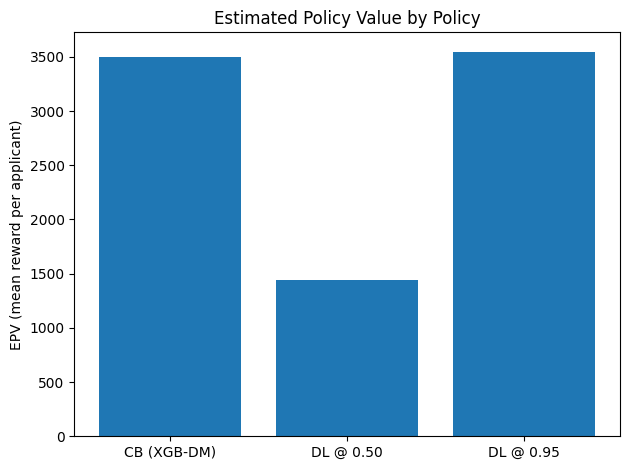

In [15]:
# 12.1) Bar chart: Estimated Policy Value (EPV)
plt.figure()
labels = ["CB (XGB-DM)", "DL @ 0.50", "DL @ 0.95"]
values = [cb_mean, dl050_mean, dlopt_mean]
plt.bar(labels, values)
plt.ylabel("EPV (mean reward per applicant)")
plt.title("Estimated Policy Value by Policy")
plt.tight_layout()
plt.show()

The bar chart shows that both the Contextual Bandit (CB) and the Deep Learning model at 0.95 threshold achieve the highest profit (≈3500 mean reward per applicant), while the DL model at 0.50 threshold performs much worse, indicating that a stricter approval threshold greatly improves profitability.

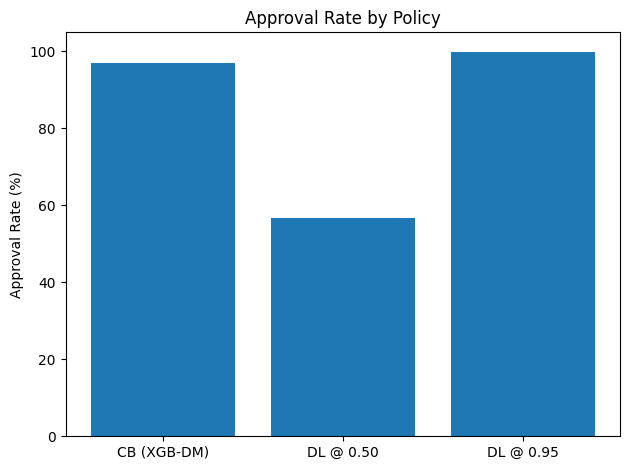

In [16]:
# 12.2) Bar chart: Approval rates
plt.figure()
rates = [cb_appr, dl050_appr, dlopt_appr]
plt.bar(labels, rates)
plt.ylabel("Approval Rate (%)")
plt.title("Approval Rate by Policy")
plt.tight_layout()
plt.show()


The chart shows that the Contextual Bandit (CB) and DL model at 0.95 threshold approve nearly all loan applications (97–100%), while the DL model at 0.50 threshold approves only about half (57%), indicating that the stricter threshold is far more selective in granting loans.

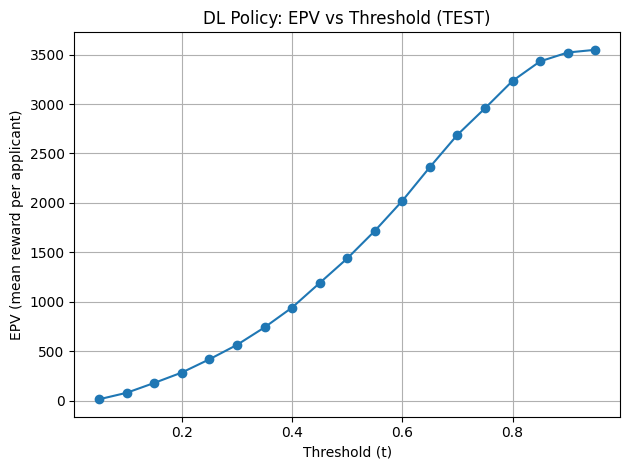

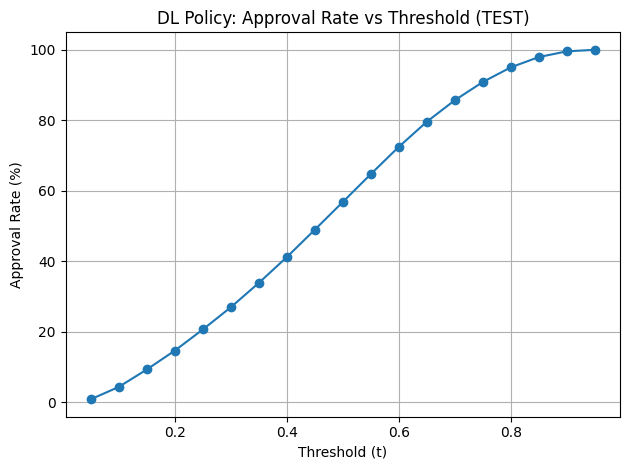

In [17]:
# 12.3) DL policy sweep: EPV vs threshold (TEST)
thresholds = np.linspace(0.05, 0.95, 19)
epv_list, appr_list = [], []
for t in thresholds:
    acts = (mlp_prob_test < t).astype(np.int32)
    rewards = np.where(acts==1, r_app, r_den)
    epv_list.append(rewards.mean())
    appr_list.append(acts.mean()*100)

plt.figure()
plt.plot(thresholds, epv_list, marker="o")
plt.xlabel("Threshold (t)")
plt.ylabel("EPV (mean reward per applicant)")
plt.title("DL Policy: EPV vs Threshold (TEST)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(thresholds, appr_list, marker="o")
plt.xlabel("Threshold (t)")
plt.ylabel("Approval Rate (%)")
plt.title("DL Policy: Approval Rate vs Threshold (TEST)")
plt.grid(True)
plt.tight_layout()
plt.show()

**EPV vs Threshold**
As the threshold rises (model becomes more confident before approving), the Expected Profit (EPV) steadily increases, peaking around t ≈ 0.9–0.95, meaning approving only the safest loans yields maximum return.


**Approval Rate vs Threshold**
The approval rate drops smoothly as the threshold increases, from nearly 100% at low thresholds to almost 0% at very high ones, showing the trade-off between profitability and inclusiveness.


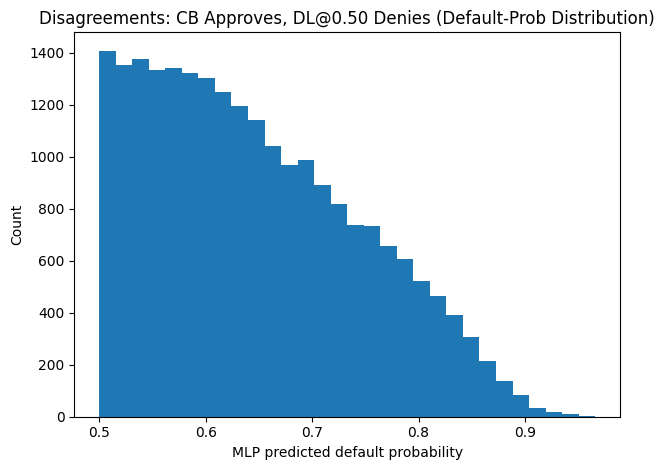

In [18]:
# 12.4) Disagreements (CB Approve vs DL@0.50 Deny): default-prob distribution
disagree_CA = (cb_actions==1) & (dl_actions_050==0)  # CB=Approve, DL@0.50=Deny
plt.figure()
plt.hist(mlp_prob_test[disagree_CA], bins=30)
plt.xlabel("MLP predicted default probability")
plt.ylabel("Count")
plt.title("Disagreements: CB Approves, DL@0.50 Denies (Default-Prob Distribution)")
plt.tight_layout()
plt.show()

This histogram shows that for loans where the Contextual Bandit (CB) chose to approve but the Deep Learning (DL @ 0.50) model denied, the predicted default probabilities mostly lie between 0.5 and 0.8.

Which concludes that the CB model is more risk-tolerant, approving many applicants whom the DL model considers moderately risky, likely because the CB policy values potential profit more than minimizing default probability.

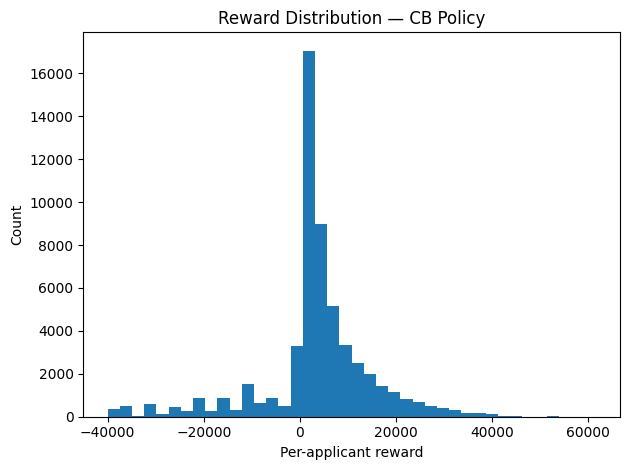

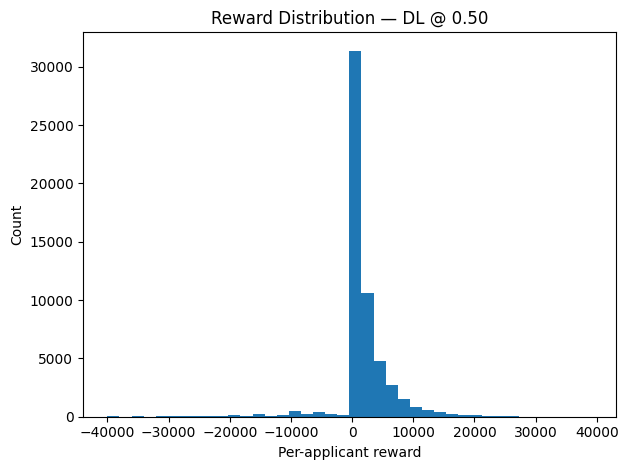

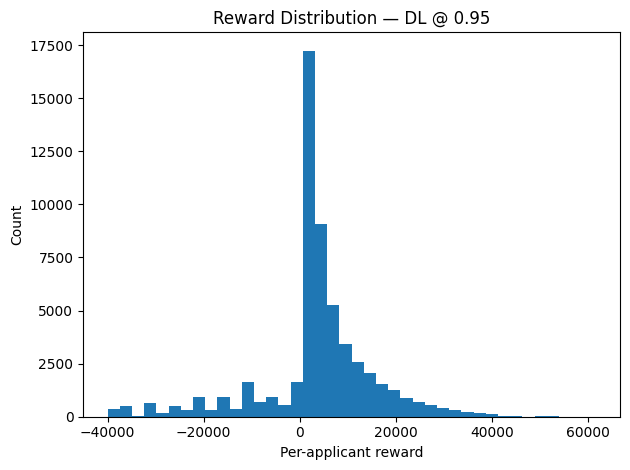

In [19]:
# 12.5) Reward distributions
plt.figure()
plt.hist(cb_rewards, bins=40)
plt.xlabel("Per-applicant reward")
plt.ylabel("Count")
plt.title("Reward Distribution — CB Policy")
plt.tight_layout()
plt.show()

plt.figure()
plt.hist(dl050_rewards, bins=40)
plt.xlabel("Per-applicant reward")
plt.ylabel("Count")
plt.title("Reward Distribution — DL @ 0.50")
plt.tight_layout()
plt.show()

plt.figure()
plt.hist(dlopt_rewards, bins=40)
plt.xlabel("Per-applicant reward")
plt.ylabel("Count")
plt.title("Reward Distribution — DL @ 0.95")
plt.tight_layout()
plt.show()


These histograms show the reward (profit/loss) distribution per applicant under different loan approval strategies:


 **CB Policy (XGB-DM):** Wide spread of rewards — includes many high-profit loans but also some large losses, meaning the model takes higher risks for potentially higher gains.


 **DL @ 0.50:** Most rewards are near zero or slightly negative — the model is cautious but too restrictive, missing many profitable approvals.


 **DL @ 0.95:** Distribution shifts toward positive rewards — fewer approvals but mostly profitable ones, showing a good balance between risk control and profit maximization.

